In [ ]:
import pandas as pd
import numpy as np


In [14]:
! pip install pydicom

In [4]:
data_cxr = pd.read_csv("full_data\TB_Portals_Published_Imaging_Data_January_2023\TB_Portals_Published_Imaging_Data_January_2023\TB_Portals_CXRs_January_2023.csv")
data_cxr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7542 entries, 0 to 7541
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   patient_id                   7542 non-null   object
 1   condition_id                 7542 non-null   object
 2   age_of_onset                 7542 non-null   int64 
 3   gender                       7542 non-null   object
 4   type_of_resistance           7542 non-null   object
 5   outcome                      7542 non-null   object
 6   imagingstudy_id              7542 non-null   object
 7   imaging_date                 7542 non-null   int64 
 8   series_instance_content_url  7542 non-null   object
 9   series_modality_cd           7542 non-null   object
dtypes: int64(2), object(8)
memory usage: 589.3+ KB


In [5]:
pd.set_option('display.max_colwidth', None)
data_cxr.head()

,patient_id,condition_id,age_of_onset,gender,type_of_resistance,outcome,imagingstudy_id,imaging_date,series_instance_content_url,series_modality_cd
0,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,41,Male,XDR,Failure,0ee10492-8adb-4c43-8b08-56952d0cc9a6,-108,00069df2-2406-43b6-8c58-5f5e164c7e35/1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.1/1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.2/1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.3.dcm,CR
1,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,41,Male,XDR,Failure,19f63a9c-1075-424f-b37d-5ac16bae4cd3,-513,00069df2-2406-43b6-8c58-5f5e164c7e35/1.3.6.1.4.1.25403.163683357445804.11044.20131119114627.13/1.3.6.1.4.1.25403.163683357445804.11044.20131119114627.14/1.3.6.1.4.1.25403.163683357445804.11044.20131119114627.15.dcm,CR
2,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,41,Male,XDR,Failure,3e8017e7-3a8a-4aa8-bdd5-29e5bf11fd6e,270,00069df2-2406-43b6-8c58-5f5e164c7e35/1.3.6.1.4.1.25403.163683357445804.11044.20131119114630.1/1.3.6.1.4.1.25403.163683357445804.11044.20131119114630.2/1.3.6.1.4.1.25403.163683357445804.11044.20131119114630.3.dcm,CR
3,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,41,Male,XDR,Failure,53859edb-9888-4b13-ac58-08bd63c2055e,-172,00069df2-2406-43b6-8c58-5f5e164c7e35/1.3.6.1.4.1.25403.163683357445804.11044.20131119114627.28/1.3.6.1.4.1.25403.163683357445804.11044.20131119114627.29/1.3.6.1.4.1.25403.163683357445804.11044.20131119114627.30.dcm,CR
4,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,41,Male,XDR,Failure,757fcd05-5edd-4a37-b577-b12d4995150d,-350,00069df2-2406-43b6-8c58-5f5e164c7e35/1.3.6.1.4.1.25403.163683357445804.11044.20131119114627.22/1.3.6.1.4.1.25403.163683357445804.11044.20131119114627.23/1.3.6.1.4.1.25403.163683357445804.11044.20131119114627.24.dcm,CR


In [6]:
data_cxr['outcome'].value_counts()

Cured                 4200
Completed             1009
Died                   685
Lost to follow up      522
Still on treatment     482
Failure                469
Palliative Care        100
Unknown                 75
Name: outcome, dtype: int64

In [7]:
data_cxr_manual = pd.read_csv("full_data\TB_Portals_Published_Imaging_Data_January_2023\TB_Portals_Published_Imaging_Data_January_2023\TB_Portals_CXR_Manual_Annotations_January_2023.csv")
data_cxr_manual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16323 entries, 0 to 16322
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   condition_id                                   16323 non-null  object 
 1   imagingstudy_id                                16323 non-null  object 
 2   sextant                                        16323 non-null  object 
 3   collapse                                       16085 non-null  float64
 4   smallcavities                                  16086 non-null  float64
 5   mediumcavities                                 16086 non-null  float64
 6   largecavities                                  16085 non-null  float64
 7   isanylargecavitybelongtoamultisextantcavity    16103 non-null  object 
 8   canmultiplecavitiesbeseen                      16099 non-null  object 
 9   lowgroundglassdensity                          160

In [8]:
data_cxr_manual['imagingstudy_id'].nunique()

5798

In [9]:
data_cxr_manual['imagingstudy_id'].nunique()

5798

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
data_cxr_manual.head()

,condition_id,imagingstudy_id,sextant,collapse,smallcavities,mediumcavities,largecavities,isanylargecavitybelongtoamultisextantcavity,canmultiplecavitiesbeseen,lowgroundglassdensity,mediumdensity,highdensity,smallnodules,mediumnodules,largenodules,hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist,isanynoncalcifiednoduleexist,isanyclusterednoduleexists,aremultiplenoduleexists,lowgroundglassdensityactivefreshnodules,mediumdensitystabalizedfibroticnodules,highdensitycalcifiedtpicallysequella,overallpercentofabnormalvolume,pleuraleffusionpercentofhemithoraxinvolved,ispleuraleffusionbilateral,othernontbabnormalities,aremediastinallymphnodespresent,rater,imaging_date,series_modality_cd
0,0000f7e6-bbd2-468d-834d-f14948c5d902,b187bf58-dbc4-4b0e-b00e-f53a96260702,Lower Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,1.0,0.0,0.0,No,Yes,No,No,1.0,0.0,0.0,20.0,0.0,No,No,Yes,General practitioner,4,XC
1,0000f7e6-bbd2-468d-834d-f14948c5d902,b187bf58-dbc4-4b0e-b00e-f53a96260702,Middle Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,42.0,0.0,0.0,0.0,No,Yes,No,Yes,42.0,0.0,0.0,20.0,0.0,No,No,Yes,General practitioner,4,XC
2,0000f7e6-bbd2-468d-834d-f14948c5d902,b187bf58-dbc4-4b0e-b00e-f53a96260702,Middle Right Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,28.0,0.0,0.0,0.0,No,Yes,No,Yes,28.0,0.0,0.0,20.0,0.0,No,No,Yes,General practitioner,4,XC
3,0000f7e6-bbd2-468d-834d-f14948c5d902,b187bf58-dbc4-4b0e-b00e-f53a96260702,Upper Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,15.0,0.0,0.0,0.0,No,Yes,No,Yes,15.0,0.0,0.0,20.0,0.0,No,No,Yes,General practitioner,4,XC
4,0000f7e6-bbd2-468d-834d-f14948c5d902,b187bf58-dbc4-4b0e-b00e-f53a96260702,Upper Right Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,35.0,1.0,0.0,0.0,No,Yes,No,Yes,36.0,0.0,0.0,20.0,0.0,No,No,Yes,General practitioner,4,XC


In [12]:
data_cxr_qure = pd.read_csv("full_data\TB_Portals_Published_Imaging_Data_January_2023\TB_Portals_Published_Imaging_Data_January_2023\TB_Portals_CXR_Qure_Annotations_January_2023.csv")
data_cxr_qure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   condition_id                   4389 non-null   object 
 1   imagingstudy_id                4389 non-null   object 
 2   qure_abnormal                  4389 non-null   object 
 3   qure_bluntedcp                 4389 non-null   object 
 4   qure_nodule                    4389 non-null   object 
 5   qure_consolidation             4389 non-null   object 
 6   qure_fibrosis                  4389 non-null   object 
 7   qure_cavity                    4389 non-null   object 
 8   qure_opacity                   4389 non-null   object 
 9   qure_peffusion                 4389 non-null   object 
 10  qure_tuberculosis              4389 non-null   object 
 11  qure_hilarlymphadenopathy      4389 non-null   object 
 12  qure_atelectasis               4389 non-null   o

In [13]:
data_cxr_qure.head()

,condition_id,imagingstudy_id,qure_abnormal,qure_bluntedcp,qure_nodule,qure_consolidation,qure_fibrosis,qure_cavity,qure_opacity,qure_peffusion,qure_tuberculosis,qure_hilarlymphadenopathy,qure_atelectasis,qure_abnormal_num,qure_bluntedcp_num,qure_nodule_num,qure_consolidation_num,qure_fibrosis_num,qure_cavity_num,qure_opacity_num,qure_peffusion_num,qure_tuberculosis_num,qure_hilarlymphadenopathy_num,qure_atelectasis_num,imaging_date,series_modality_cd
0,001dc6ee-4925-4505-a4f6-e79d2e31d1cf,688307ab-0658-4f2f-9edd-3c7e7c5d0dd2,Yes,No,No,No,No,No,Yes,No,No,No,No,0.58,0.16,0.66,0.35,0.06,0.33,0.58,0.36,0.30,0.37,0.10,0,CR
1,002cea6e-758b-4e65-b4c4-ae0155a458d8,2503380c-2e10-4153-a657-e2fbf1ca7a67,Yes,No,No,No,No,No,Yes,No,Yes,No,No,0.65,0.07,0.71,0.42,0.07,0.55,0.65,0.24,0.65,0.38,0.60,-49,CR
2,003e095a-db07-4abe-b07d-3050fc77f925,a8ebca0c-ae17-4549-a478-b0bddd2757ee,Yes,Yes,No,No,Yes,No,Yes,No,Yes,No,No,0.86,0.88,0.93,0.38,0.85,0.12,0.88,0.60,0.84,0.26,0.61,27,XC
3,004e71c5-d99a-42ae-bfa3-c46ddca6aece,f8cdb0dd-6f1a-4a2f-870f-8c6b7fdecee7,No,No,No,No,No,No,No,No,No,No,No,0.22,0.30,0.07,0.39,0.11,0.27,0.47,0.27,0.04,0.16,0.07,0,CR
4,0066aeeb-ae1b-433c-b4ab-cc023a928a92,6ced292d-a0b6-4d46-858b-6b9784b18487,No,No,No,No,No,No,No,No,No,No,No,0.36,0.28,0.37,0.32,0.10,0.33,0.47,0.43,0.10,0.51,0.65,0,CR


In [14]:
data_cxr_qure['qure_tuberculosis'].value_counts()

Yes    2934
No     1455
Name: qure_tuberculosis, dtype: int64

In [15]:
data_cxr_qure['imagingstudy_id'].nunique()

4383

In [16]:
inner_join = pd.merge(data_cxr_manual, data_cxr_qure, on='imagingstudy_id', how='inner')

In [49]:
inner_join.head()

,condition_id_x,imagingstudy_id,sextant,collapse,smallcavities,mediumcavities,largecavities,isanylargecavitybelongtoamultisextantcavity,canmultiplecavitiesbeseen,lowgroundglassdensity,mediumdensity,highdensity,smallnodules,mediumnodules,largenodules,hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist,isanynoncalcifiednoduleexist,isanyclusterednoduleexists,aremultiplenoduleexists,lowgroundglassdensityactivefreshnodules,mediumdensitystabalizedfibroticnodules,highdensitycalcifiedtpicallysequella,overallpercentofabnormalvolume,pleuraleffusionpercentofhemithoraxinvolved,ispleuraleffusionbilateral,othernontbabnormalities,aremediastinallymphnodespresent,rater,imaging_date_x,series_modality_cd_x,condition_id_y,qure_abnormal,qure_bluntedcp,qure_nodule,qure_consolidation,qure_fibrosis,qure_cavity,qure_opacity,qure_peffusion,qure_tuberculosis,qure_hilarlymphadenopathy,qure_atelectasis,qure_abnormal_num,qure_bluntedcp_num,qure_nodule_num,qure_consolidation_num,qure_fibrosis_num,qure_cavity_num,qure_opacity_num,qure_peffusion_num,qure_tuberculosis_num,qure_hilarlymphadenopathy_num,qure_atelectasis_num,imaging_date_y,series_modality_cd_y
0,001dc6ee-4925-4505-a4f6-e79d2e31d1cf,688307ab-0658-4f2f-9edd-3c7e7c5d0dd2,Lower Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,20.0,0.0,7.0,0.0,0.0,0.0,No,Yes,Yes,No,5.0,2.0,0.0,20.0,10.0,No,Yes,Yes,General practitioner,0,CR,001dc6ee-4925-4505-a4f6-e79d2e31d1cf,Yes,No,No,No,No,No,Yes,No,No,No,No,0.58,0.16,0.66,0.35,0.06,0.33,0.58,0.36,0.30,0.37,0.1,0,CR
1,001dc6ee-4925-4505-a4f6-e79d2e31d1cf,688307ab-0658-4f2f-9edd-3c7e7c5d0dd2,Middle Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,10.0,0.0,0.0,No,Yes,No,Yes,10.0,0.0,0.0,20.0,10.0,No,Yes,Yes,General practitioner,0,CR,001dc6ee-4925-4505-a4f6-e79d2e31d1cf,Yes,No,No,No,No,No,Yes,No,No,No,No,0.58,0.16,0.66,0.35,0.06,0.33,0.58,0.36,0.30,0.37,0.1,0,CR
2,001dc6ee-4925-4505-a4f6-e79d2e31d1cf,688307ab-0658-4f2f-9edd-3c7e7c5d0dd2,Upper Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,30.0,0.0,5.0,0.0,0.0,0.0,No,Yes,Yes,No,5.0,0.0,0.0,20.0,10.0,No,Yes,Yes,General practitioner,0,CR,001dc6ee-4925-4505-a4f6-e79d2e31d1cf,Yes,No,No,No,No,No,Yes,No,No,No,No,0.58,0.16,0.66,0.35,0.06,0.33,0.58,0.36,0.30,0.37,0.1,0,CR
3,002cea6e-758b-4e65-b4c4-ae0155a458d8,2503380c-2e10-4153-a657-e2fbf1ca7a67,Middle Left Sextant,0.0,0.0,0.0,0.0,No,No,35.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,30.0,0.0,No,No,Yes,General practitioner,-49,CR,002cea6e-758b-4e65-b4c4-ae0155a458d8,Yes,No,No,No,No,No,Yes,No,Yes,No,No,0.65,0.07,0.71,0.42,0.07,0.55,0.65,0.24,0.65,0.38,0.6,-49,CR
4,002cea6e-758b-4e65-b4c4-ae0155a458d8,2503380c-2e10-4153-a657-e2fbf1ca7a67,Upper Left Sextant,0.0,0.0,0.0,0.0,No,No,80.0,0.0,0.0,3.0,0.0,0.0,0.0,No,Yes,Yes,No,0.0,3.0,0.0,30.0,0.0,No,No,Yes,General practitioner,-49,CR,002cea6e-758b-4e65-b4c4-ae0155a458d8,Yes,No,No,No,No,No,Yes,No,Yes,No,No,0.65,0.07,0.71,0.42,0.07,0.55,0.65,0.24,0.65,0.38,0.6,-49,CR


In [18]:
inner_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8497 entries, 0 to 8496
Data columns (total 56 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   condition_id_x                                 8497 non-null   object 
 1   imagingstudy_id                                8497 non-null   object 
 2   sextant                                        8497 non-null   object 
 3   collapse                                       8342 non-null   float64
 4   smallcavities                                  8343 non-null   float64
 5   mediumcavities                                 8343 non-null   float64
 6   largecavities                                  8342 non-null   float64
 7   isanylargecavitybelongtoamultisextantcavity    8354 non-null   object 
 8   canmultiplecavitiesbeseen                      8351 non-null   object 
 9   lowgroundglassdensity                          8347 

In [50]:
inner_join_new = inner_join.drop(['condition_id_x', 'imaging_date_x','series_modality_cd_y', 'condition_id_y', 'imaging_date_y'], axis=1)

In [51]:
inner_join_new

,imagingstudy_id,sextant,collapse,smallcavities,mediumcavities,largecavities,isanylargecavitybelongtoamultisextantcavity,canmultiplecavitiesbeseen,lowgroundglassdensity,mediumdensity,highdensity,smallnodules,mediumnodules,largenodules,hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist,isanynoncalcifiednoduleexist,isanyclusterednoduleexists,aremultiplenoduleexists,lowgroundglassdensityactivefreshnodules,mediumdensitystabalizedfibroticnodules,highdensitycalcifiedtpicallysequella,overallpercentofabnormalvolume,pleuraleffusionpercentofhemithoraxinvolved,ispleuraleffusionbilateral,othernontbabnormalities,aremediastinallymphnodespresent,rater,series_modality_cd_x,qure_abnormal,qure_bluntedcp,qure_nodule,qure_consolidation,qure_fibrosis,qure_cavity,qure_opacity,qure_peffusion,qure_tuberculosis,qure_hilarlymphadenopathy,qure_atelectasis,qure_abnormal_num,qure_bluntedcp_num,qure_nodule_num,qure_consolidation_num,qure_fibrosis_num,qure_cavity_num,qure_opacity_num,qure_peffusion_num,qure_tuberculosis_num,qure_hilarlymphadenopathy_num,qure_atelectasis_num
0,688307ab-0658-4f2f-9edd-3c7e7c5d0dd2,Lower Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,20.0,0.0,7.0,0.0,0.0,0.0,No,Yes,Yes,No,5.0,2.0,0.0,20.0,10.0,No,Yes,Yes,General practitioner,CR,Yes,No,No,No,No,No,Yes,No,No,No,No,0.58,0.16,0.66,0.35,0.06,0.33,0.58,0.36,0.30,0.37,0.10
1,688307ab-0658-4f2f-9edd-3c7e7c5d0dd2,Middle Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,10.0,0.0,0.0,No,Yes,No,Yes,10.0,0.0,0.0,20.0,10.0,No,Yes,Yes,General practitioner,CR,Yes,No,No,No,No,No,Yes,No,No,No,No,0.58,0.16,0.66,0.35,0.06,0.33,0.58,0.36,0.30,0.37,0.10
2,688307ab-0658-4f2f-9edd-3c7e7c5d0dd2,Upper Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,30.0,0.0,5.0,0.0,0.0,0.0,No,Yes,Yes,No,5.0,0.0,0.0,20.0,10.0,No,Yes,Yes,General practitioner,CR,Yes,No,No,No,No,No,Yes,No,No,No,No,0.58,0.16,0.66,0.35,0.06,0.33,0.58,0.36,0.30,0.37,0.10
3,2503380c-2e10-4153-a657-e2fbf1ca7a67,Middle Left Sextant,0.0,0.0,0.0,0.0,No,No,35.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,30.0,0.0,No,No,Yes,General practitioner,CR,Yes,No,No,No,No,No,Yes,No,Yes,No,No,0.65,0.07,0.71,0.42,0.07,0.55,0.65,0.24,0.65,0.38,0.60
4,2503380c-2e10-4153-a657-e2fbf1ca7a67,Upper Left Sextant,0.0,0.0,0.0,0.0,No,No,80.0,0.0,0.0,3.0,0.0,0.0,0.0,No,Yes,Yes,No,0.0,3.0,0.0,30.0,0.0,No,No,Yes,General practitioner,CR,Yes,No,No,No,No,No,Yes,No,Yes,No,No,0.65,0.07,0.71,0.42,0.07,0.55,0.65,0.24,0.65,0.38,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8492,2e71b6b4-ffd6-45ff-b985-0ecb1d6ce003,Upper Right Sextant,0.0,20.0,0.0,0.0,No,No,0.0,0.0,0.0,50.0,10.0,0.0,0.0,No,Yes,Yes,Yes,55.0,5.0,0.0,85.0,0.0,No,No,No,Radiologist,CR,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,No,0.90,0.83,0.91,0.75,0.95,0.92,0.94,0.47,0.98,0.26,0.66
8493,2791000a-9136-4cef-a714-a2b6170c4bf2,Upper Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,5.0,0.0,0.0,0.0,No,Yes,Yes,No,5.0,0.0,0.0,2.0,0.0,No,No,No,Radiologist,CR,No,No,No,No,No,No,No,No,No,No,No,0.06,0.02,0.14,0.01,0.03,0.03,0.09,0.02,0.02,0.12,0.12
8494,5b4ffd48-cfda-455a-9965-14dbd1d76443,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,No,Yes,No,Radiologist,CR,No,No,No,No,No,No,No,No,No,No,No,0.08,0.04,0.13,0.04,0.23,0.01,0.11,0.02,0.04,0.09,0.11
8495,1cc881f7-3337-4472-bdad-bf67235e823f,Upper Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,16.0,0.0,0.0,0.0,No,Yes,Yes,Yes,16.0,0.0,0.0,7.0,0.0,No,No,No,Radiologist,CR,Yes,No,No,No,Yes,No,No,No,Yes,No,No,0.68,0.00,0.42,0.01,0.81,0.02,0.40,0.01,0.55,0.02,0.15


In [21]:
inner_join_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8497 entries, 0 to 8496
Data columns (total 51 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   imagingstudy_id                                8497 non-null   object 
 1   sextant                                        8497 non-null   object 
 2   collapse                                       8342 non-null   float64
 3   smallcavities                                  8343 non-null   float64
 4   mediumcavities                                 8343 non-null   float64
 5   largecavities                                  8342 non-null   float64
 6   isanylargecavitybelongtoamultisextantcavity    8354 non-null   object 
 7   canmultiplecavitiesbeseen                      8351 non-null   object 
 8   lowgroundglassdensity                          8347 non-null   float64
 9   mediumdensity                                  8342 

In [52]:
inner_join_new['qure_tuberculosis'].value_counts()

Yes    6350
No     2147
Name: qure_tuberculosis, dtype: int64

In [23]:
inner_join_new['imagingstudy_id'].nunique()

2972

In [24]:
# Extract the patient ID columns from both DataFrames
patient_ids_patient_orig = set(data_cxr['imagingstudy_id'])
patient_ids_tuberculosis_joined = set(inner_join_new['imagingstudy_id'])

# Count the number of patient IDs from the tuberculosis file that are present in the patient file
common_patient_ids_orig_join = patient_ids_patient_orig.intersection(patient_ids_tuberculosis_joined)
count_common_patient_ids_orig_join = len(common_patient_ids_orig_join)

# Print the result
print("Number of patient IDs from the tuberculosis file present in the patient file:", count_common_patient_ids_orig_join)


Number of patient IDs from the tuberculosis file present in the patient file: 2972


In [53]:
inner_join_all_combined = pd.merge(data_cxr, inner_join_new, on='imagingstudy_id', how='inner')

In [54]:
inner_join_all_combined

,patient_id,condition_id,age_of_onset,gender,type_of_resistance,outcome,imagingstudy_id,imaging_date,series_instance_content_url,series_modality_cd,sextant,collapse,smallcavities,mediumcavities,largecavities,isanylargecavitybelongtoamultisextantcavity,canmultiplecavitiesbeseen,lowgroundglassdensity,mediumdensity,highdensity,smallnodules,mediumnodules,largenodules,hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist,isanynoncalcifiednoduleexist,isanyclusterednoduleexists,aremultiplenoduleexists,lowgroundglassdensityactivefreshnodules,mediumdensitystabalizedfibroticnodules,highdensitycalcifiedtpicallysequella,overallpercentofabnormalvolume,pleuraleffusionpercentofhemithoraxinvolved,ispleuraleffusionbilateral,othernontbabnormalities,aremediastinallymphnodespresent,rater,series_modality_cd_x,qure_abnormal,qure_bluntedcp,qure_nodule,qure_consolidation,qure_fibrosis,qure_cavity,qure_opacity,qure_peffusion,qure_tuberculosis,qure_hilarlymphadenopathy,qure_atelectasis,qure_abnormal_num,qure_bluntedcp_num,qure_nodule_num,qure_consolidation_num,qure_fibrosis_num,qure_cavity_num,qure_opacity_num,qure_peffusion_num,qure_tuberculosis_num,qure_hilarlymphadenopathy_num,qure_atelectasis_num
0,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,41,Male,XDR,Failure,da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5,0,00069df2-2406-43b6-8c58-5f5e164c7e35/1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.7/1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.8/1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.9.dcm,CR,Lower Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,5.0,0.0,5.0,0.0,0.0,No,No,No,No,0.0,5.0,0.0,3.0,0.0,No,No,No,Radiologist,CR,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0.80,0.66,0.06,0.34,0.25,0.24,0.66,0.66,0.15,0.06,0.93
1,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,41,Male,XDR,Failure,da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5,0,00069df2-2406-43b6-8c58-5f5e164c7e35/1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.7/1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.8/1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.9.dcm,CR,Middle Right Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,2.0,8.0,0.0,0.0,Yes,Yes,No,Yes,1.0,9.0,0.0,3.0,0.0,No,No,No,Radiologist,CR,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0.80,0.66,0.06,0.34,0.25,0.24,0.66,0.66,0.15,0.06,0.93
2,00617d3b-7975-49e1-9b44-cadfcb01d739,66fe8f1d-bf75-4730-bbe4-000f4b2e84ca,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,76,00617d3b-7975-49e1-9b44-cadfcb01d739/1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1/1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2/1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Lower Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,CR,No,No,No,No,No,No,No,No,No,No,No,0.26,0.41,0.20,0.05,0.24,0.26,0.47,0.27,0.10,0.20,0.40
3,00617d3b-7975-49e1-9b44-cadfcb01d739,66fe8f1d-bf75-4730-bbe4-000f4b2e84ca,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,76,00617d3b-7975-49e1-9b44-cadfcb01d739/1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1/1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2/1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Middle Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,CR,No,No,No,No,No,No,No,No,No,No,No,0.26,0.41,0.20,0.05,0.24,0.26,0.47,0.27,0.10,0.20,0.40
4,00617d3b-7975-49e1-9b44-cadfcb01d739,66fe8f1d-bf75-4730-bbe4-000f4b2e84ca,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,76,00617d3b-7975-49e1-9b44-cadfcb01d739/1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1/1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2/1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Upper Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,CR,

In [27]:
inner_join_all_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8497 entries, 0 to 8496
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   patient_id                                     8497 non-null   object 
 1   condition_id                                   8497 non-null   object 
 2   age_of_onset                                   8497 non-null   int64  
 3   gender                                         8497 non-null   object 
 4   type_of_resistance                             8497 non-null   object 
 5   outcome                                        8497 non-null   object 
 6   imagingstudy_id                                8497 non-null   object 
 7   imaging_date                                   8497 non-null   int64  
 8   series_instance_content_url                    8497 non-null   object 
 9   series_modality_cd                             8497 

In [55]:
final_dataframe_combined = inner_join_all_combined.drop(['condition_id', 'imaging_date','series_modality_cd_x'], axis=1)

In [56]:
final_dataframe_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8497 entries, 0 to 8496
Data columns (total 57 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   patient_id                                     8497 non-null   object 
 1   age_of_onset                                   8497 non-null   int64  
 2   gender                                         8497 non-null   object 
 3   type_of_resistance                             8497 non-null   object 
 4   outcome                                        8497 non-null   object 
 5   imagingstudy_id                                8497 non-null   object 
 6   series_instance_content_url                    8497 non-null   object 
 7   series_modality_cd                             8497 non-null   object 
 8   sextant                                        8497 non-null   object 
 9   collapse                                       8342 

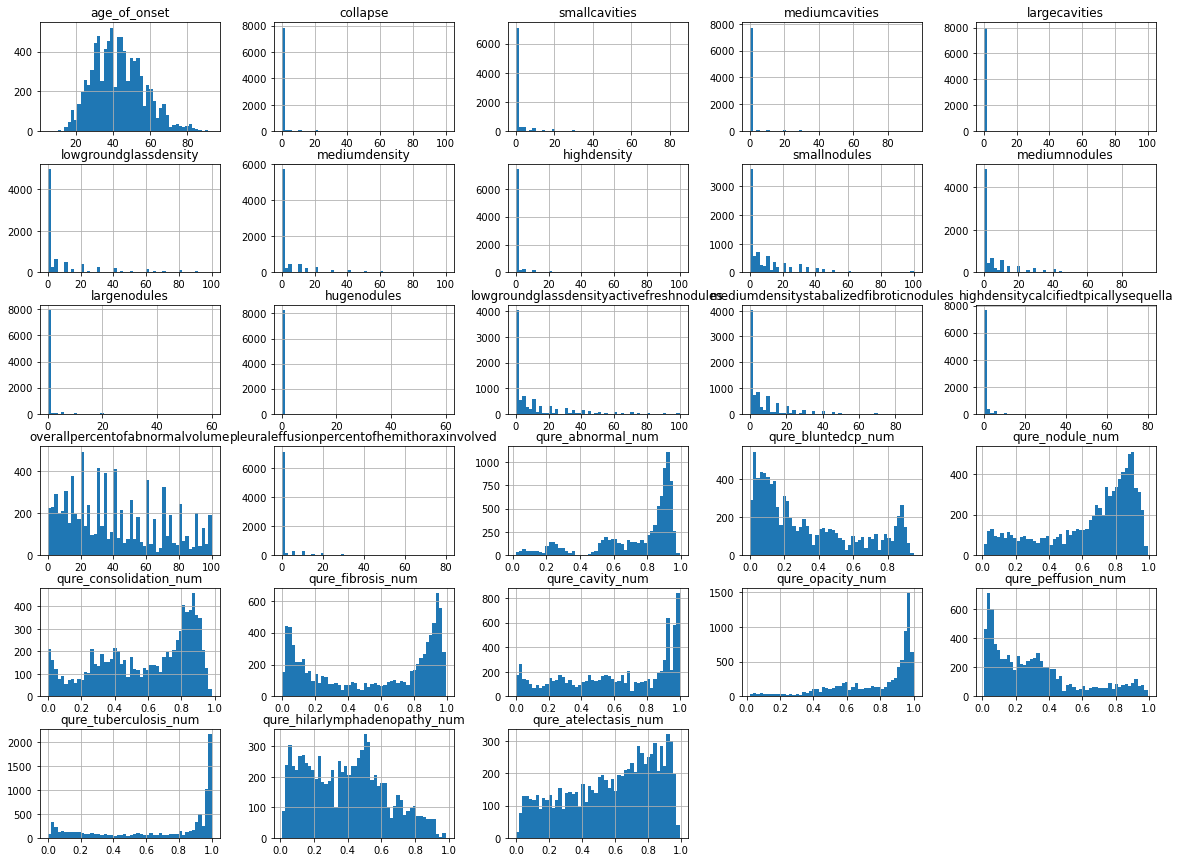

In [57]:
import matplotlib.pyplot as plt

# Plot histograms of all features
final_dataframe_combined.hist(bins=50, figsize=(20,15))
plt.show()

In [58]:
# Create a new column 'NewColumn' and initialize it with empty strings
final_dataframe_combined['Target'] = ''

# Set the values of 'NewColumn' to 'TB' where 'outcome' is 'Failure'
final_dataframe_combined.loc[final_dataframe_combined['outcome'] == 'Failure', 'Target'] = 'TB'
final_dataframe_combined.loc[final_dataframe_combined['outcome'] == 'Died', 'Target'] = 'TB'
final_dataframe_combined.loc[final_dataframe_combined['outcome'] == 'Still on treatment', 'Target'] = 'TB'
final_dataframe_combined.loc[final_dataframe_combined['outcome'] == 'Palliative Care', 'Target'] = 'TB'
final_dataframe_combined.loc[final_dataframe_combined['outcome'] == 'Cured', 'Target'] = 'Normal'

tb_rows = final_dataframe_combined[(final_dataframe_combined['outcome'] == 'Failure') & (final_dataframe_combined['Target'] == 'TB')]
print(tb_rows)

                                patient_id  age_of_onset  gender  \
0     00069df2-2406-43b6-8c58-5f5e164c7e35            41    Male   
1     00069df2-2406-43b6-8c58-5f5e164c7e35            41    Male   
20    00f27e0d-fed0-4b26-bae3-74500b0d8f8b            57  Female   
21    00f27e0d-fed0-4b26-bae3-74500b0d8f8b            57  Female   
27    0130a0d2-9e3e-47c9-a3f8-5729509f4bf0            51    Male   
...                                    ...           ...     ...   
8472  ff0b26b0-c4dd-4664-81e3-9c482b58655f            38  Female   
8473  ff0b26b0-c4dd-4664-81e3-9c482b58655f            38  Female   
8474  ff0b26b0-c4dd-4664-81e3-9c482b58655f            38  Female   
8495  ffd914a0-89dd-4a7e-a959-0342b3c43e20            43    Male   
8496  ffd914a0-89dd-4a7e-a959-0342b3c43e20            43    Male   

     type_of_resistance  outcome                       imagingstudy_id  \
0                   XDR  Failure  da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5   
1                   XDR  Failure  d

In [59]:
tb_rows = final_dataframe_combined[(final_dataframe_combined['outcome'] == 'Cured') & (final_dataframe_combined['Target'] == 'Normal')]
print(tb_rows)

                                patient_id  age_of_onset  gender  \
2     00617d3b-7975-49e1-9b44-cadfcb01d739            48    Male   
3     00617d3b-7975-49e1-9b44-cadfcb01d739            48    Male   
4     00617d3b-7975-49e1-9b44-cadfcb01d739            48    Male   
5     00617d3b-7975-49e1-9b44-cadfcb01d739            48    Male   
8     0070e6ec-2727-4e74-80c9-fb7dc8b3430b            64    Male   
...                                    ...           ...     ...   
8490  ffa41f66-dcda-4562-a695-c351090e7317            25  Female   
8491  ffa41f66-dcda-4562-a695-c351090e7317            25  Female   
8492  ffa41f66-dcda-4562-a695-c351090e7317            25  Female   
8493  ffa41f66-dcda-4562-a695-c351090e7317            25  Female   
8494  ffa41f66-dcda-4562-a695-c351090e7317            25  Female   

     type_of_resistance outcome                       imagingstudy_id  \
2           MDR non XDR   Cured  17e14ad6-4df5-48ab-a2a8-acb2e090c263   
3           MDR non XDR   Cured  17e1

In [60]:
tb_rows = final_dataframe_combined[(final_dataframe_combined['outcome'] == 'Died') & (final_dataframe_combined['Target'] == 'TB')]
print(tb_rows)

                                patient_id  age_of_onset  gender  \
45    019e155c-6ef1-4414-92da-8ee189489012            29  Female   
46    019e155c-6ef1-4414-92da-8ee189489012            29  Female   
47    019e155c-6ef1-4414-92da-8ee189489012            29  Female   
48    019e155c-6ef1-4414-92da-8ee189489012            29  Female   
49    019e155c-6ef1-4414-92da-8ee189489012            29  Female   
...                                    ...           ...     ...   
8484  ff938aad-ffa0-483f-90c8-dd3d4ee85f7f            40    Male   
8485  ff938aad-ffa0-483f-90c8-dd3d4ee85f7f            40    Male   
8486  ff938aad-ffa0-483f-90c8-dd3d4ee85f7f            40    Male   
8487  ff938aad-ffa0-483f-90c8-dd3d4ee85f7f            40    Male   
8488  ff938aad-ffa0-483f-90c8-dd3d4ee85f7f            40    Male   

     type_of_resistance outcome                       imagingstudy_id  \
45          MDR non XDR    Died  af4d206b-a175-4394-8785-4020bcf0b794   
46          MDR non XDR    Died  af4d

In [61]:
tb_rows = final_dataframe_combined[(final_dataframe_combined['outcome'] == 'Still on treatment') & (final_dataframe_combined['Target'] == 'TB')]
print(tb_rows)

                                patient_id  age_of_onset  gender  \
32    013fa063-281f-489a-b7f8-4d0d880ca378            21  Female   
55    0241e399-6b09-42d1-be59-f3761977f923            36    Male   
56    0241e399-6b09-42d1-be59-f3761977f923            36    Male   
57    0241e399-6b09-42d1-be59-f3761977f923            36    Male   
65    027cfd54-c6fd-4628-9b49-c7aa0c9626c5            34  Female   
...                                    ...           ...     ...   
8453  fea46ea7-b2a7-40f9-b180-51d31995b215            22    Male   
8454  fea46ea7-b2a7-40f9-b180-51d31995b215            22    Male   
8470  ff009adf-b338-4179-8a7c-6d977334b93e            21  Female   
8475  ff69171a-aa4a-4891-984f-ddc82e41840d            51    Male   
8476  ff69171a-aa4a-4891-984f-ddc82e41840d            51    Male   

     type_of_resistance             outcome  \
32            Sensitive  Still on treatment   
55          MDR non XDR  Still on treatment   
56          MDR non XDR  Still on treatmen

In [62]:
tb_rows = final_dataframe_combined[(final_dataframe_combined['outcome'] == 'Palliative Care') & (final_dataframe_combined['Target'] == 'TB')]
print(tb_rows)

                                patient_id  age_of_onset  gender  \
75    02d53d56-59ed-4bce-8fd4-8d485b6d7027            29    Male   
76    02d53d56-59ed-4bce-8fd4-8d485b6d7027            29    Male   
77    02d53d56-59ed-4bce-8fd4-8d485b6d7027            29    Male   
78    02d53d56-59ed-4bce-8fd4-8d485b6d7027            29    Male   
187   067540f2-6b41-4a1b-b7f3-1657646eaa97            46  Female   
...                                    ...           ...     ...   
7289  de63d810-74a6-48be-89cf-218a7d3ff8b7            44    Male   
7293  deb0a72d-8250-4a1d-ab52-ba923845fde4            41    Male   
7294  deb0a72d-8250-4a1d-ab52-ba923845fde4            41    Male   
7568  e624ca81-7757-4f1d-847b-1e8c5317b0a8            36  Female   
8063  f421fa5d-ee3b-4602-ba79-fb34e9933ce9            74    Male   

     type_of_resistance          outcome  \
75          MDR non XDR  Palliative Care   
76          MDR non XDR  Palliative Care   
77          MDR non XDR  Palliative Care   
78     

In [63]:
final_dataframe_combined['outcome'].value_counts()

Cured                 4622
Died                   957
Completed              828
Failure                628
Lost to follow up      620
Still on treatment     606
Palliative Care        177
Unknown                 59
Name: outcome, dtype: int64

In [64]:
final_dataframe_combined['Target'].value_counts()

Normal    4622
TB        2368
          1507
Name: Target, dtype: int64

In [65]:
# Create a new DataFrame to store the rows with 'Completed' as the outcome
completed_df = final_dataframe_combined[final_dataframe_combined['outcome'] == 'Completed']
lost_to_follow_df = final_dataframe_combined[final_dataframe_combined['outcome'] == 'Lost to follow up']
unknown_df = final_dataframe_combined[final_dataframe_combined['outcome'] == 'Unknown']

# Remove the rows with 'Completed' as the outcome from the original DataFrame
final_dataframe_combined = final_dataframe_combined[final_dataframe_combined['outcome'] != 'Completed']
final_dataframe_combined = final_dataframe_combined[final_dataframe_combined['outcome'] != 'Lost to follow up']
final_dataframe_combined = final_dataframe_combined[final_dataframe_combined['outcome'] != 'Unknown']
final_dataframe_combined['Target'].value_counts()

Normal    4622
TB        2368
Name: Target, dtype: int64

In [66]:
final_dataframe_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 0 to 8496
Data columns (total 58 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   patient_id                                     6990 non-null   object 
 1   age_of_onset                                   6990 non-null   int64  
 2   gender                                         6990 non-null   object 
 3   type_of_resistance                             6990 non-null   object 
 4   outcome                                        6990 non-null   object 
 5   imagingstudy_id                                6990 non-null   object 
 6   series_instance_content_url                    6990 non-null   object 
 7   series_modality_cd                             6990 non-null   object 
 8   sextant                                        6990 non-null   object 
 9   collapse                                       6874 

In [67]:
# Append the string to all values in the column
final_dataframe_combined['series_instance_content_url'] = 'full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\\' + final_dataframe_combined['series_instance_content_url']
final_dataframe_combined['series_instance_content_url'] = final_dataframe_combined['series_instance_content_url'].str.replace('/', '\\')
final_dataframe_combined

,patient_id,age_of_onset,gender,type_of_resistance,outcome,imagingstudy_id,series_instance_content_url,series_modality_cd,sextant,collapse,smallcavities,mediumcavities,largecavities,isanylargecavitybelongtoamultisextantcavity,canmultiplecavitiesbeseen,lowgroundglassdensity,mediumdensity,highdensity,smallnodules,mediumnodules,largenodules,hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist,isanynoncalcifiednoduleexist,isanyclusterednoduleexists,aremultiplenoduleexists,lowgroundglassdensityactivefreshnodules,mediumdensitystabalizedfibroticnodules,highdensitycalcifiedtpicallysequella,overallpercentofabnormalvolume,pleuraleffusionpercentofhemithoraxinvolved,ispleuraleffusionbilateral,othernontbabnormalities,aremediastinallymphnodespresent,rater,qure_abnormal,qure_bluntedcp,qure_nodule,qure_consolidation,qure_fibrosis,qure_cavity,qure_opacity,qure_peffusion,qure_tuberculosis,qure_hilarlymphadenopathy,qure_atelectasis,qure_abnormal_num,qure_bluntedcp_num,qure_nodule_num,qure_consolidation_num,qure_fibrosis_num,qure_cavity_num,qure_opacity_num,qure_peffusion_num,qure_tuberculosis_num,qure_hilarlymphadenopathy_num,qure_atelectasis_num,Target
0,00069df2-2406-43b6-8c58-5f5e164c7e35,41,Male,XDR,Failure,da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00069df2-2406-43b6-8c58-5f5e164c7e35\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.7\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.8\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.9.dcm,CR,Lower Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,5.0,0.0,5.0,0.0,0.0,No,No,No,No,0.0,5.0,0.0,3.0,0.0,No,No,No,Radiologist,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0.80,0.66,0.06,0.34,0.25,0.24,0.66,0.66,0.15,0.06,0.93,TB
1,00069df2-2406-43b6-8c58-5f5e164c7e35,41,Male,XDR,Failure,da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00069df2-2406-43b6-8c58-5f5e164c7e35\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.7\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.8\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.9.dcm,CR,Middle Right Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,2.0,8.0,0.0,0.0,Yes,Yes,No,Yes,1.0,9.0,0.0,3.0,0.0,No,No,No,Radiologist,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0.80,0.66,0.06,0.34,0.25,0.24,0.66,0.66,0.15,0.06,0.93,TB
2,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Lower Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,No,No,No,No,No,No,No,No,No,No,No,0.26,0.41,0.20,0.05,0.24,0.26,0.47,0.27,0.10,0.20,0.40,Normal
3,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Middle Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,No,No,No,No,No,No,No,No,No,No,No,0.26,0.41,0.20,0.05,0.24,0.26,0.47,0.27,0.10,0.20,0.40,Normal
4,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Upper Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,

In [68]:
final_dataframe_combined

,patient_id,age_of_onset,gender,type_of_resistance,outcome,imagingstudy_id,series_instance_content_url,series_modality_cd,sextant,collapse,smallcavities,mediumcavities,largecavities,isanylargecavitybelongtoamultisextantcavity,canmultiplecavitiesbeseen,lowgroundglassdensity,mediumdensity,highdensity,smallnodules,mediumnodules,largenodules,hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist,isanynoncalcifiednoduleexist,isanyclusterednoduleexists,aremultiplenoduleexists,lowgroundglassdensityactivefreshnodules,mediumdensitystabalizedfibroticnodules,highdensitycalcifiedtpicallysequella,overallpercentofabnormalvolume,pleuraleffusionpercentofhemithoraxinvolved,ispleuraleffusionbilateral,othernontbabnormalities,aremediastinallymphnodespresent,rater,qure_abnormal,qure_bluntedcp,qure_nodule,qure_consolidation,qure_fibrosis,qure_cavity,qure_opacity,qure_peffusion,qure_tuberculosis,qure_hilarlymphadenopathy,qure_atelectasis,qure_abnormal_num,qure_bluntedcp_num,qure_nodule_num,qure_consolidation_num,qure_fibrosis_num,qure_cavity_num,qure_opacity_num,qure_peffusion_num,qure_tuberculosis_num,qure_hilarlymphadenopathy_num,qure_atelectasis_num,Target
0,00069df2-2406-43b6-8c58-5f5e164c7e35,41,Male,XDR,Failure,da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00069df2-2406-43b6-8c58-5f5e164c7e35\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.7\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.8\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.9.dcm,CR,Lower Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,5.0,0.0,5.0,0.0,0.0,No,No,No,No,0.0,5.0,0.0,3.0,0.0,No,No,No,Radiologist,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0.80,0.66,0.06,0.34,0.25,0.24,0.66,0.66,0.15,0.06,0.93,TB
1,00069df2-2406-43b6-8c58-5f5e164c7e35,41,Male,XDR,Failure,da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00069df2-2406-43b6-8c58-5f5e164c7e35\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.7\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.8\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.9.dcm,CR,Middle Right Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,2.0,8.0,0.0,0.0,Yes,Yes,No,Yes,1.0,9.0,0.0,3.0,0.0,No,No,No,Radiologist,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0.80,0.66,0.06,0.34,0.25,0.24,0.66,0.66,0.15,0.06,0.93,TB
2,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Lower Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,No,No,No,No,No,No,No,No,No,No,No,0.26,0.41,0.20,0.05,0.24,0.26,0.47,0.27,0.10,0.20,0.40,Normal
3,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Middle Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,No,No,No,No,No,No,No,No,No,No,No,0.26,0.41,0.20,0.05,0.24,0.26,0.47,0.27,0.10,0.20,0.40,Normal
4,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Upper Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,

In [69]:
final_dataframe_combined = final_dataframe_combined.reset_index(drop=True)

In [70]:
final_dataframe_combined

,patient_id,age_of_onset,gender,type_of_resistance,outcome,imagingstudy_id,series_instance_content_url,series_modality_cd,sextant,collapse,smallcavities,mediumcavities,largecavities,isanylargecavitybelongtoamultisextantcavity,canmultiplecavitiesbeseen,lowgroundglassdensity,mediumdensity,highdensity,smallnodules,mediumnodules,largenodules,hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist,isanynoncalcifiednoduleexist,isanyclusterednoduleexists,aremultiplenoduleexists,lowgroundglassdensityactivefreshnodules,mediumdensitystabalizedfibroticnodules,highdensitycalcifiedtpicallysequella,overallpercentofabnormalvolume,pleuraleffusionpercentofhemithoraxinvolved,ispleuraleffusionbilateral,othernontbabnormalities,aremediastinallymphnodespresent,rater,qure_abnormal,qure_bluntedcp,qure_nodule,qure_consolidation,qure_fibrosis,qure_cavity,qure_opacity,qure_peffusion,qure_tuberculosis,qure_hilarlymphadenopathy,qure_atelectasis,qure_abnormal_num,qure_bluntedcp_num,qure_nodule_num,qure_consolidation_num,qure_fibrosis_num,qure_cavity_num,qure_opacity_num,qure_peffusion_num,qure_tuberculosis_num,qure_hilarlymphadenopathy_num,qure_atelectasis_num,Target
0,00069df2-2406-43b6-8c58-5f5e164c7e35,41,Male,XDR,Failure,da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00069df2-2406-43b6-8c58-5f5e164c7e35\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.7\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.8\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.9.dcm,CR,Lower Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,5.0,0.0,5.0,0.0,0.0,No,No,No,No,0.0,5.0,0.0,3.0,0.0,No,No,No,Radiologist,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0.80,0.66,0.06,0.34,0.25,0.24,0.66,0.66,0.15,0.06,0.93,TB
1,00069df2-2406-43b6-8c58-5f5e164c7e35,41,Male,XDR,Failure,da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00069df2-2406-43b6-8c58-5f5e164c7e35\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.7\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.8\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.9.dcm,CR,Middle Right Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,2.0,8.0,0.0,0.0,Yes,Yes,No,Yes,1.0,9.0,0.0,3.0,0.0,No,No,No,Radiologist,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0.80,0.66,0.06,0.34,0.25,0.24,0.66,0.66,0.15,0.06,0.93,TB
2,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Lower Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,No,No,No,No,No,No,No,No,No,No,No,0.26,0.41,0.20,0.05,0.24,0.26,0.47,0.27,0.10,0.20,0.40,Normal
3,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Middle Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,No,No,No,No,No,No,No,No,No,No,No,0.26,0.41,0.20,0.05,0.24,0.26,0.47,0.27,0.10,0.20,0.40,Normal
4,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Upper Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,

In [71]:
# Check for duplicate rows
duplicate_rows = final_dataframe_combined.duplicated()

# Print the duplicate rows
print(final_dataframe_combined[duplicate_rows])

Empty DataFrame
Columns: [patient_id, age_of_onset, gender, type_of_resistance, outcome, imagingstudy_id, series_instance_content_url, series_modality_cd, sextant, collapse, smallcavities, mediumcavities, largecavities, isanylargecavitybelongtoamultisextantcavity, canmultiplecavitiesbeseen, lowgroundglassdensity, mediumdensity, highdensity, smallnodules, mediumnodules, largenodules, hugenodules, isanycalcifiedorpartiallycalcifiednoduleexist, isanynoncalcifiednoduleexist, isanyclusterednoduleexists, aremultiplenoduleexists, lowgroundglassdensityactivefreshnodules, mediumdensitystabalizedfibroticnodules, highdensitycalcifiedtpicallysequella, overallpercentofabnormalvolume, pleuraleffusionpercentofhemithoraxinvolved, ispleuraleffusionbilateral, othernontbabnormalities, aremediastinallymphnodespresent, rater, qure_abnormal, qure_bluntedcp, qure_nodule, qure_consolidation, qure_fibrosis, qure_cavity, qure_opacity, qure_peffusion, qure_tuberculosis, qure_hilarlymphadenopathy, qure_atelectasi

In [73]:
final_dataframe_combined['Target'].value_counts()

Normal    4622
TB        2368
Name: Target, dtype: int64

In [74]:
final_dataframe_combined['qure_tuberculosis'].value_counts()

Yes    5114
No     1876
Name: qure_tuberculosis, dtype: int64

In [75]:
final_dataframe_combined.loc[final_dataframe_combined['qure_tuberculosis'] == 'Yes', 'Target'] = 'TB'
final_dataframe_combined.loc[final_dataframe_combined['qure_tuberculosis'] == 'No', 'Target'] = 'Normal'
final_dataframe_combined

,patient_id,age_of_onset,gender,type_of_resistance,outcome,imagingstudy_id,series_instance_content_url,series_modality_cd,sextant,collapse,smallcavities,mediumcavities,largecavities,isanylargecavitybelongtoamultisextantcavity,canmultiplecavitiesbeseen,lowgroundglassdensity,mediumdensity,highdensity,smallnodules,mediumnodules,largenodules,hugenodules,isanycalcifiedorpartiallycalcifiednoduleexist,isanynoncalcifiednoduleexist,isanyclusterednoduleexists,aremultiplenoduleexists,lowgroundglassdensityactivefreshnodules,mediumdensitystabalizedfibroticnodules,highdensitycalcifiedtpicallysequella,overallpercentofabnormalvolume,pleuraleffusionpercentofhemithoraxinvolved,ispleuraleffusionbilateral,othernontbabnormalities,aremediastinallymphnodespresent,rater,qure_abnormal,qure_bluntedcp,qure_nodule,qure_consolidation,qure_fibrosis,qure_cavity,qure_opacity,qure_peffusion,qure_tuberculosis,qure_hilarlymphadenopathy,qure_atelectasis,qure_abnormal_num,qure_bluntedcp_num,qure_nodule_num,qure_consolidation_num,qure_fibrosis_num,qure_cavity_num,qure_opacity_num,qure_peffusion_num,qure_tuberculosis_num,qure_hilarlymphadenopathy_num,qure_atelectasis_num,Target
0,00069df2-2406-43b6-8c58-5f5e164c7e35,41,Male,XDR,Failure,da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00069df2-2406-43b6-8c58-5f5e164c7e35\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.7\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.8\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.9.dcm,CR,Lower Left Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,5.0,0.0,5.0,0.0,0.0,No,No,No,No,0.0,5.0,0.0,3.0,0.0,No,No,No,Radiologist,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0.80,0.66,0.06,0.34,0.25,0.24,0.66,0.66,0.15,0.06,0.93,Normal
1,00069df2-2406-43b6-8c58-5f5e164c7e35,41,Male,XDR,Failure,da6fc9b9-bf07-4b8b-9fd5-76f60ea11ef5,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00069df2-2406-43b6-8c58-5f5e164c7e35\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.7\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.8\1.3.6.1.4.1.25403.163683357445804.11044.20131119114628.9.dcm,CR,Middle Right Sextant,0.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,2.0,8.0,0.0,0.0,Yes,Yes,No,Yes,1.0,9.0,0.0,3.0,0.0,No,No,No,Radiologist,Yes,No,No,No,No,No,Yes,No,No,No,Yes,0.80,0.66,0.06,0.34,0.25,0.24,0.66,0.66,0.15,0.06,0.93,Normal
2,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Lower Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,No,No,No,No,No,No,No,No,No,No,No,0.26,0.41,0.20,0.05,0.24,0.26,0.47,0.27,0.10,0.20,0.40,Normal
3,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Middle Right Sextant,2.0,0.0,0.0,0.0,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,No,No,0.0,0.0,0.0,1.0,0.0,No,No,No,Radiologist,No,No,No,No,No,No,No,No,No,No,No,0.26,0.41,0.20,0.05,0.24,0.26,0.47,0.27,0.10,0.20,0.40,Normal
4,00617d3b-7975-49e1-9b44-cadfcb01d739,48,Male,MDR non XDR,Cured,17e14ad6-4df5-48ab-a2a8-acb2e090c263,full_data\TB_Portals_Published_CXRs_January_2023\GlobalBucket\00617d3b-7975-49e1-9b44-cadfcb01d739\1.2.840.114062.2.192.168.196.14.2018.12.20.10.54.58.7173796.1\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.2\1.2.840.114062.2.192.168.196.14.2018.12.20.10.55.42.7217906.dcm,CR,Upper Right Sextant,2.0,0.0,0.0,0.0,No

In [76]:
final_dataframe_combined['Target'].value_counts()

TB        5114
Normal    1876
Name: Target, dtype: int64

In [77]:
# Save the DataFrame to a CSV file
final_dataframe_combined.to_csv('cleaned_data_latest.csv', index=False)